In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON EB/EE DATA SEPARATELY AND UNIFIED AFTERWARDS, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [3]:
# Variable you want to correct
ylist = ["R9"]#, "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR", 'CovarianceIetaIphi', 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
#NB: we have already corrected mc and data,ie weighted wrt to the PU
# Upload Dataframes:
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")

qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_NoPu.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_NoPu.h5", 0, -1)

#-------------------------------------------------------------
qr_data = quantileRegression("data")
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_NoPuTot.h5", 0, -1)
dfdata=qr_data.getDF()

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_NoPu.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_NoPu.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_NoPuTot.h5
Selecting events   [ 0 ,  3000000 ]  out of  3000000
number of events: 3000000


In [5]:
#Assign weighted runperiod to MC
vecPeriod=np.array([len(dfdata.query("runperiod==1").index),
          len(dfdata.query("runperiod==2").index),
          len(dfdata.query("runperiod==3").index),
          len(dfdata.query("runperiod==4").index),
          len(dfdata.query("runperiod==5").index)])
print vecPeriod
vecPeriod=vecPeriod/float(vecPeriod.sum())
print vecPeriod
period=np.array([0,
                 vecPeriod[0],
                 vecPeriod[0]+vecPeriod[1],
                 vecPeriod[0]+vecPeriod[1]+vecPeriod[2],
                 vecPeriod[0]+vecPeriod[1]+vecPeriod[2]+vecPeriod[3],
                 vecPeriod[0]+vecPeriod[1]+vecPeriod[2]+vecPeriod[3]+vecPeriod[4]+0.1])
print period
qr_mc1.df["runperiod"]=np.digitize(np.random.rand(len(qr_mc1.df.index)),period)
qr_mc2.df["runperiod"]=np.digitize(np.random.rand(len(qr_mc2.df.index)),period)
vecPeriod=np.array([len(qr_mc1.df.query("runperiod==1").index),
          len(qr_mc1.df.query("runperiod==2").index),
          len(qr_mc1.df.query("runperiod==3").index),
          len(qr_mc1.df.query("runperiod==4").index),
          len(qr_mc1.df.query("runperiod==5").index)])
print vecPeriod
vecPeriod=np.array([len(qr_mc2.df.query("runperiod==1").index),
          len(qr_mc2.df.query("runperiod==2").index),
          len(qr_mc2.df.query("runperiod==3").index),
          len(qr_mc2.df.query("runperiod==4").index),
          len(qr_mc2.df.query("runperiod==5").index)])
print vecPeriod

[1085233  326801  249993  630421  707552]
[ 0.36174433  0.10893367  0.083331    0.21014033  0.23585067]
[ 0.          0.36174433  0.470678    0.554009    0.76414933  1.1       ]
[723606 218602 166681 419222 471889]
[723985 217862 166940 419216 471997]


In [6]:
qr_mc1.correctAllTime(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_NoPu") 
qr_mc2.correctAllTime(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_NoPu") 
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2) 
dfmc = data2.reset_index() 

Corrected variables file (e.g.  correctedTargetsPeriod1weights_Period_NoPu_EB.h5  ) does not exists. This will take a while...
Correct EB :
-1.4442  <  ScEta  and  ScEta  <  1.4442
Loading mc weights for  R9  : 
    ./weights/weights_Period_NoPu_1/mc_weights_EB
Loading data weights for  R9
    ./weights/weights_Period_NoPu_Tot/data_weights_EB
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9 for mc
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho', 'runperiod']  target y =  R9 for data
Writing correctedTargets_ EB .h5
Corrected variables file (e.g.  correctedTargetsPeriod2weights_Period_NoPu_EB.h5  ) does not exists. This will take a while...
Correct EB :
-1.4442  <  ScEta  and  ScEta  <  1.4442
Loading mc weights for  R9  : 
    ./weights/weights_Period_NoPu_2/mc_weights_EB
Loading data weights for  R9
    ./weights/weights_Period_NoPu_Tot/data_weights_EB
Get corrections for  R9  with quantiles

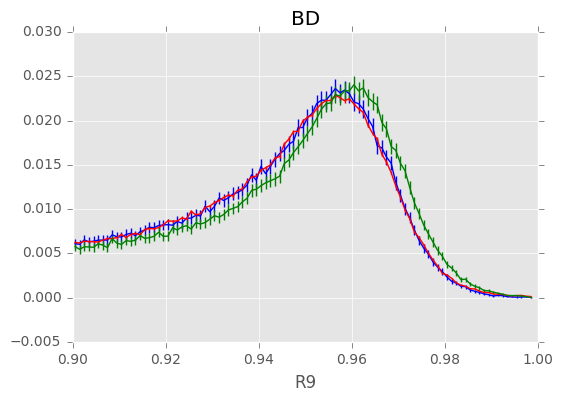

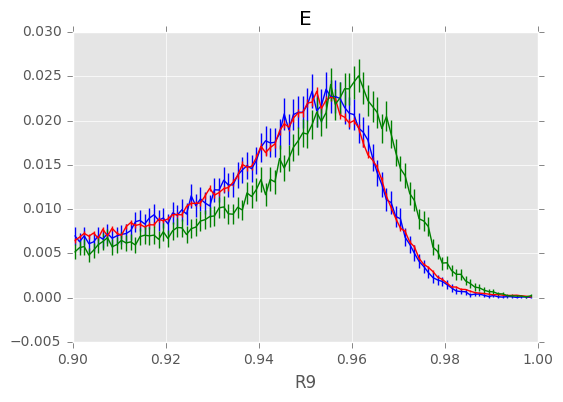

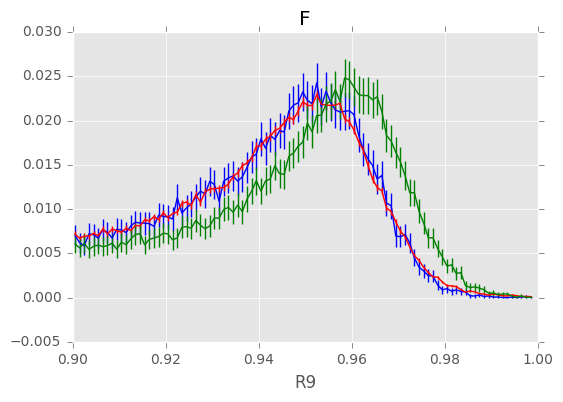

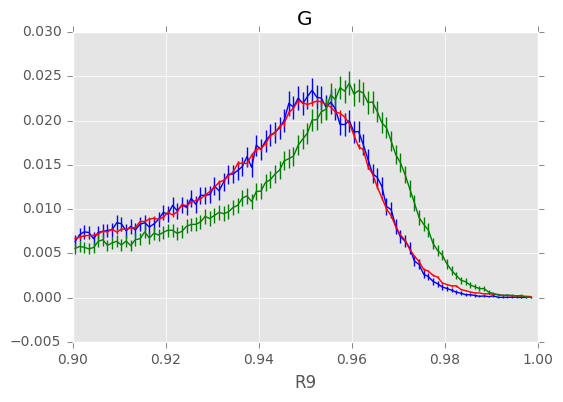

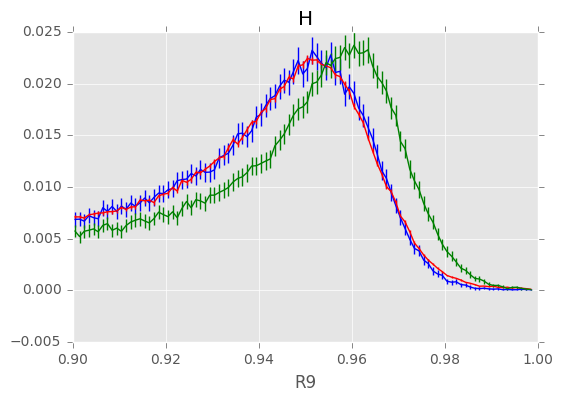

In [19]:
#Plots per period
#dfmc=dfmc.sample(2000000)
dfdata=dfdata.sample(2000000)
rv2 = np.arange(0.9,1.0,0.001)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
  
plot.plotHistErr(dfmc.query("runperiod==1")["R9_corr"], rv2, Weight=dfmc.query("runperiod==1")["weight"], Color="b")
plot.plotHistErr(dfdata.query("runperiod==1")["R9"], rv2, Color="r", Weight=dfdata.query("runperiod==1")["weight"])
plot.plotHistErr(dfmc.query("runperiod==1")["R9"], rv2, Weight=dfmc.query("runperiod==1")["weight"], Color="g")  

ax.set_title('BD')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
  
plot.plotHistErr(dfmc.query("runperiod==2")["R9_corr"], rv2, Weight=dfmc.query("runperiod==2")["weight"], Color="b")
plot.plotHistErr(dfdata.query("runperiod==2")["R9"], rv2, Color="r", Weight=dfdata.query("runperiod==2")["weight"])
plot.plotHistErr(dfmc.query("runperiod==2")["R9"], rv2, Weight=dfmc.query("runperiod==2")["weight"], Color="g")  

ax.set_title('E')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
  
plot.plotHistErr(dfmc.query("runperiod==3")["R9_corr"], rv2, Weight=dfmc.query("runperiod==3")["weight"], Color="b")
plot.plotHistErr(dfdata.query("runperiod==3")["R9"], rv2, Color="r", Weight=dfdata.query("runperiod==3")["weight"])
plot.plotHistErr(dfmc.query("runperiod==3")["R9"], rv2, Weight=dfmc.query("runperiod==3")["weight"], Color="g")  

ax.set_title('F')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
  
plot.plotHistErr(dfmc.query("runperiod==4")["R9_corr"], rv2, Weight=dfmc.query("runperiod==4")["weight"], Color="b")
plot.plotHistErr(dfdata.query("runperiod==4")["R9"], rv2, Color="r", Weight=dfdata.query("runperiod==4")["weight"])
plot.plotHistErr(dfmc.query("runperiod==4")["R9"], rv2, Weight=dfmc.query("runperiod==4")["weight"], Color="g")  

ax.set_title('G')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
  
plot.plotHistErr(dfmc.query("runperiod==5")["R9_corr"], rv2, Weight=dfmc.query("runperiod==5")["weight"], Color="b")
plot.plotHistErr(dfdata.query("runperiod==5")["R9"], rv2, Color="r", Weight=dfdata.query("runperiod==5")["weight"])
plot.plotHistErr(dfmc.query("runperiod==5")["R9"], rv2, Weight=dfmc.query("runperiod==5")["weight"], Color="g")  

ax.set_title('H')

In [21]:
#Correct PU
#first divide dataframe
dfdata1   = dfdata  .query('runperiod==1').reset_index(drop=True)  
dfdata2   = dfdata  .query('runperiod==2').reset_index(drop=True)  
dfdata3   = dfdata  .query('runperiod==3').reset_index(drop=True)  
dfdata4   = dfdata  .query('runperiod==4').reset_index(drop=True)  
dfdata5   = dfdata  .query('runperiod==5').reset_index(drop=True)  

dfmc1   = dfmc.query('runperiod==1').reset_index(drop=True)  
dfmc2   = dfmc.query('runperiod==2').reset_index(drop=True)  
dfmc3   = dfmc.query('runperiod==3').reset_index(drop=True)  
dfmc4   = dfmc.query('runperiod==4').reset_index(drop=True)  
dfmc5   = dfmc.query('runperiod==5').reset_index(drop=True)

#get ratio all wrt dfdata5
rv=np.arange(0,40,0.06)
ratiodata1,edge,ratiodataErr= plot.getHistRatio(dfdata5.loc[:,"rho"],dfdata1.loc[:,"rho"],rv)
ratiodata2,edge,ratiodataErrE= plot.getHistRatio(dfdata5.loc[:,"rho"],dfdata2.loc[:,"rho"],rv)
ratiodata3,edge,ratiodataErrF= plot.getHistRatio(dfdata5.loc[:,"rho"],dfdata3.loc[:,"rho"],rv)
ratiodata4,edge,ratiodataErrG= plot.getHistRatio(dfdata5.loc[:,"rho"],dfdata4.loc[:,"rho"],rv)

ratiomc1,edge,ratiodataErr= plot.getHistRatio(dfdata5.loc[:,"rho"],dfmc1.loc[:,"rho"],rv)
ratiomc2,edge,ratiodataErrE= plot.getHistRatio(dfdata5.loc[:,"rho"],dfmc2.loc[:,"rho"],rv)
ratiomc3,edge,ratiodataErrF= plot.getHistRatio(dfdata5.loc[:,"rho"],dfmc3.loc[:,"rho"],rv)
ratiomc4,edge,ratiodataErrG= plot.getHistRatio(dfdata5.loc[:,"rho"],dfmc4.loc[:,"rho"],rv)
ratiomc5,edge,ratiodataErrG= plot.getHistRatio(dfdata5.loc[:,"rho"],dfmc5.loc[:,"rho"],rv)

In [22]:
#correct
import pandas as pd
#find correction and create weight vector.
dfdata1['bin'] = np.digitize(dfdata1['rho'],edge)
dfdata1["weight"]= ratiodata1[dfdata1['bin'].values-1]

dfdata2['bin'] = np.digitize(dfdata2['rho'],edge)
dfdata2["weight"]= ratiodata2[dfdata2['bin'].values-1]

dfdata3['bin'] = np.digitize(dfdata3['rho'],edge)
dfdata3["weight"]= ratiodata3[dfdata3['bin'].values-1]

dfdata4['bin'] = np.digitize(dfdata4['rho'],edge)
dfdata4["weight"]= ratiodata4[dfdata4['bin'].values-1]

#cut some infinities:
dfdata1= dfdata1.query("weight<1000")
dfdata2= dfdata2.query("weight<1000")
dfdata3= dfdata3.query("weight<1000")
dfdata4= dfdata4.query("weight<1000")

#correct MC
dfmc1['bin'] = np.digitize(dfmc1['rho'],edge)
dfmc1["corr"]= ratiomc1[dfmc1['bin'].values-1]
dfmc1["weight"]=dfmc1["weight"]*dfmc1["corr"]

dfmc2['bin'] = np.digitize(dfmc2['rho'],edge)
dfmc2["corr"]= ratiomc2[dfmc2['bin'].values-1]
dfmc2["weight"]=dfmc2["weight"]*dfmc2["corr"]

dfmc3['bin'] = np.digitize(dfmc3['rho'],edge)
dfmc3["corr"]= ratiomc3[dfmc3['bin'].values-1]
dfmc3["weight"]=dfmc3["weight"]*dfmc3["corr"]

dfmc4['bin'] = np.digitize(dfmc4['rho'],edge)
dfmc4["corr"]= ratiomc4[dfmc4['bin'].values-1]
dfmc4["weight"]=dfmc4["weight"]*dfmc4["corr"]

dfmc5['bin'] = np.digitize(dfmc5['rho'],edge)
dfmc5["corr"]= ratiomc5[dfmc5['bin'].values-1]
dfmc5["weight"]=dfmc5["weight"]*dfmc5["corr"]
#cut some infinities:
dfmc1= dfmc1.query("weight<1000")
dfmc2= dfmc2.query("weight<1000")
dfmc3= dfmc3.query("weight<1000")
dfmc4= dfmc4.query("weight<1000")
dfmc5= dfmc5.query("weight<1000")

dfmc=pd.concat([dfmc1,dfmc2,dfmc3,dfmc4,dfmc5]).reset_index(drop=True)
dfdata=pd.concat([dfdata1,dfdata2,dfdata3,dfdata4,dfdata5]).reset_index(drop=True)

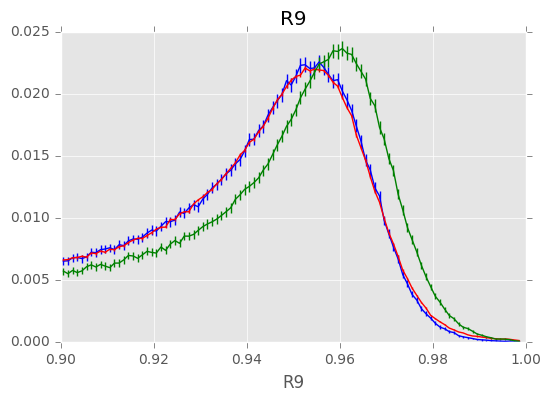

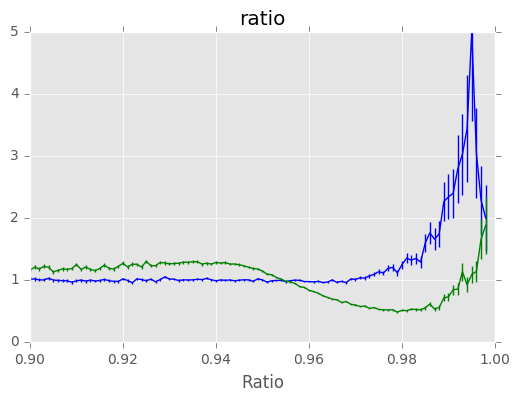

In [23]:

rv2 = np.arange(0.9,1.0,0.001)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
  
plot.plotHistErr(dfmc["R9_corr"], rv2, Weight=dfmc["weight"], Color="b")
plot.plotHistErr(dfdata["R9"], rv2, Color="r", Weight=dfdata["weight"])
plot.plotHistErr(dfmc["R9"], rv2, Weight=dfmc["weight"], Color="g")  

ax.set_title('R9')

rv2 = np.arange(0.9,1.0,0.001)

rv=np.arange(0,40,0.5)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Ratio")
    
plot.plotHistRatio(dfdata["R9"],dfmc["R9_corr"], rv2,Weight1=dfdata["weight"],Weight2=dfmc["weight"], Color="b")
plot.plotHistRatio(dfdata["R9"],dfmc["R9"], rv2,Weight1=dfdata["weight"],Weight2=dfmc["weight"], Color="g")
ax.set_ylim(0,5)
ax.set_title('ratio')

plotting  R9


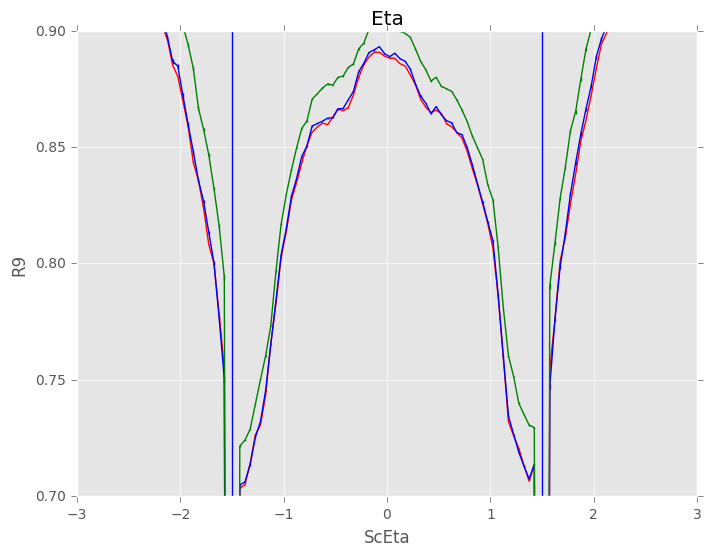

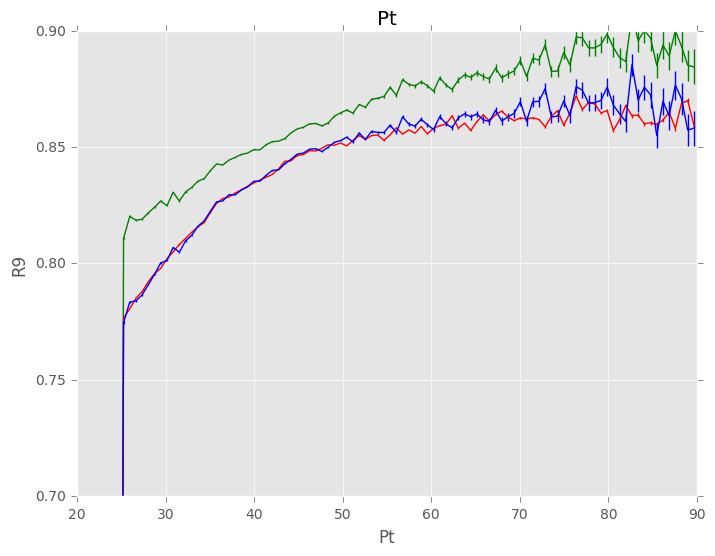

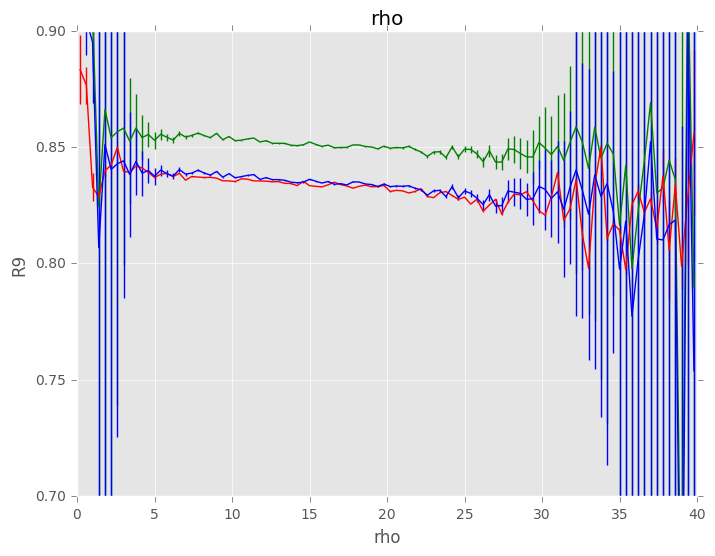

In [24]:
for yvar in ["R9"]:#, "S4", "SigmaIeIe", "EtaWidth"]:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    if yvar == "R9":
        minEB, maxEB = 0.7, 0.9
        minEE, maxEE = 0.7, 0.9
    

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('ScEta')
    ax.set_ylabel(yvar)
    
    
    ax.axvline(x=1.5)
    ax.axvline(x=-1.5)
    
    
    
    plot.Profile(dfdata['ScEta'], dfdata[yvar]      ,100,-2.5,2.5,ax, 'red',dfdata["weight"])
    plot.Profile(dfmc['ScEta']  , dfmc[yvar+'_corr'],100,-2.5,2.5,ax, 'blue',dfmc['weight'])
    plot.Profile(dfmc['ScEta']  , dfmc[yvar]        ,100,-2.5,2.5,ax,'green',dfmc['weight'])
    ax.set_title('Eta')   
#---------------------------------------------------------------------------------------------------------
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('Pt')
    ax.set_ylabel(yvar)
    

    
    plot.Profile(dfmc['Pt']  , dfmc[yvar]        ,100,20.,90.,ax, 'green',dfmc["weight"])
    plot.Profile(dfdata['Pt'], dfdata[yvar]      ,100,20.,90.,ax, 'red',dfdata["weight"])
    plot.Profile(dfmc['Pt']  , dfmc[yvar+'_corr'],100,20.,90.,ax, 'blue',dfmc["weight"])
    ax.set_title('Pt') 
#---------------------------------------------------------------------------------------------------------
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('rho')
    ax.set_ylabel(yvar)
    
   
    
    plot.Profile(dfmc['rho']  , dfmc[yvar]        ,100,0.,40.,ax, 'green',dfmc["weight"])
    plot.Profile(dfdata['rho'], dfdata[yvar]      ,100,0.,40.,ax, 'red',dfdata["weight"])
    plot.Profile(dfmc['rho']  , dfmc[yvar+'_corr'],100,0.,40.,ax, 'blue',dfmc["weight"])
    ax.set_title('rho') 


In [25]:
print len(dfdata.index), len(dfmc.index)

2000000 1997592


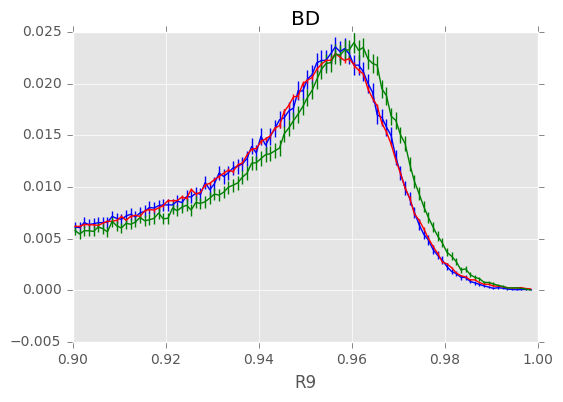

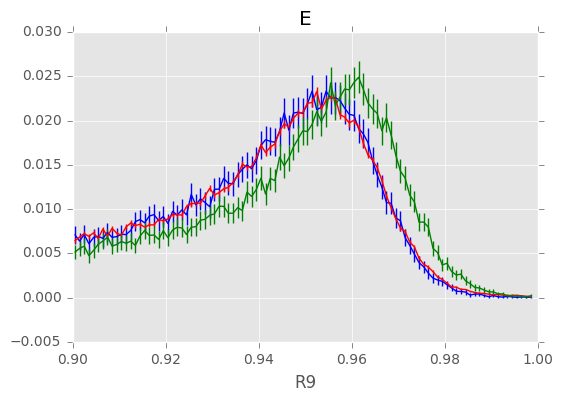

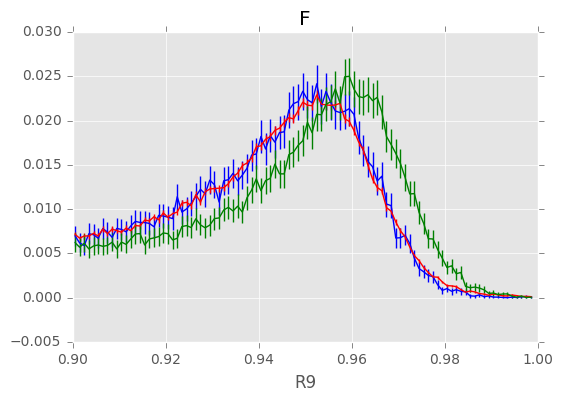

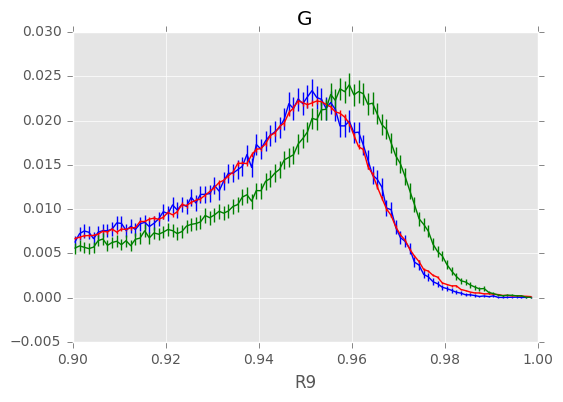

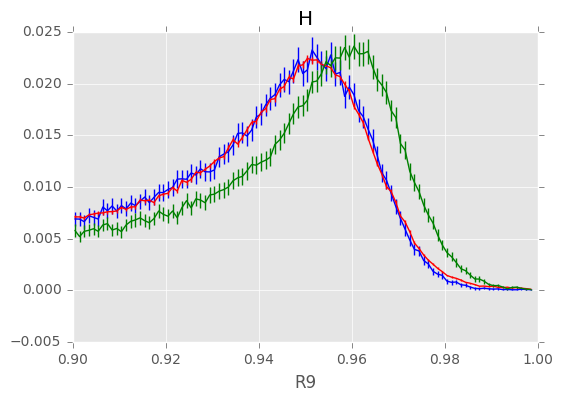

In [26]:
#Plots per period
#dfmc=dfmc.sample(2000000)
dfdata=dfdata.sample(2000000)
rv2 = np.arange(0.9,1.0,0.001)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
  
plot.plotHistErr(dfmc.query("runperiod==1")["R9_corr"], rv2, Weight=dfmc.query("runperiod==1")["weight"], Color="b")
plot.plotHistErr(dfdata.query("runperiod==1")["R9"], rv2, Color="r", Weight=dfdata.query("runperiod==1")["weight"])
plot.plotHistErr(dfmc.query("runperiod==1")["R9"], rv2, Weight=dfmc.query("runperiod==1")["weight"], Color="g")  

ax.set_title('BD')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
  
plot.plotHistErr(dfmc.query("runperiod==2")["R9_corr"], rv2, Weight=dfmc.query("runperiod==2")["weight"], Color="b")
plot.plotHistErr(dfdata.query("runperiod==2")["R9"], rv2, Color="r", Weight=dfdata.query("runperiod==2")["weight"])
plot.plotHistErr(dfmc.query("runperiod==2")["R9"], rv2, Weight=dfmc.query("runperiod==2")["weight"], Color="g")  

ax.set_title('E')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
  
plot.plotHistErr(dfmc.query("runperiod==3")["R9_corr"], rv2, Weight=dfmc.query("runperiod==3")["weight"], Color="b")
plot.plotHistErr(dfdata.query("runperiod==3")["R9"], rv2, Color="r", Weight=dfdata.query("runperiod==3")["weight"])
plot.plotHistErr(dfmc.query("runperiod==3")["R9"], rv2, Weight=dfmc.query("runperiod==3")["weight"], Color="g")  

ax.set_title('F')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
  
plot.plotHistErr(dfmc.query("runperiod==4")["R9_corr"], rv2, Weight=dfmc.query("runperiod==4")["weight"], Color="b")
plot.plotHistErr(dfdata.query("runperiod==4")["R9"], rv2, Color="r", Weight=dfdata.query("runperiod==4")["weight"])
plot.plotHistErr(dfmc.query("runperiod==4")["R9"], rv2, Weight=dfmc.query("runperiod==4")["weight"], Color="g")  

ax.set_title('G')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
  
plot.plotHistErr(dfmc.query("runperiod==5")["R9_corr"], rv2, Weight=dfmc.query("runperiod==5")["weight"], Color="b")
plot.plotHistErr(dfdata.query("runperiod==5")["R9"], rv2, Color="r", Weight=dfdata.query("runperiod==5")["weight"])
plot.plotHistErr(dfmc.query("runperiod==5")["R9"], rv2, Weight=dfmc.query("runperiod==5")["weight"], Color="g")  

ax.set_title('H')

In [27]:
import pandas as pd
dfname =  'df_data_19.h5'
hdf = pd.HDFStore(dfname)
hdf.put('df', dfdata)
hdf.close()
dfname =  'df_mc_19.h5'
hdf = pd.HDFStore(dfname)
hdf.put('df', dfmc)
hdf.close()